In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc

# Preprocessing

In [85]:
qPCR = pd.read_csv('qPCR_data.csv', sep='\t', index_col=0)
qPCR.head()

,SNORD3B,HULC,LINC01226,hsa_circ_0073052,hsa_circ_0080695,miR-21,miR-26a,miR-27a,miR-122,miR-192,miR-223,label
sample_id,,,,,,,,,,,,
HCC_ShH-332406,3.072431,-1.554841,1.131273,-0.066437,-6.124729,8.133185,-0.624419,0.237637,9.456500,-0.158377,-5.195042,HCC
HCC_ShH-333568,-1.559677,-2.728607,-0.959708,0.666755,-7.979978,0.805463,0.138164,1.198761,3.474772,-1.359291,-6.533736,HCC
HCC_ShH-321590,-2.077954,-8.188078,-6.783983,NaN,NaN,-1.105434,-2.046128,-1.087293,0.544543,-3.750608,-9.531275,HCC
HCC_ShH-335701,7.648093,2.122047,5.224223,1.938615,-4.897092,-1.374800,-1.308909,-2.635333,1.437953,-5.036686,-8.267998,HCC
HCC_ShH-335789,2.819371,-4.583385,-3.332853,-0.514964,-8.407561,-1.697270,-1.083671,-1.049840,0.884081,-4.349654,-8.383437,HCC


In [86]:
y = qPCR['label'].map({'NC':0, 'HCC':1})
data = qPCR.iloc[:, :-1]
data = data.fillna(data.mean(axis=0))
X = data.values
X = StandardScaler().fit_transform(X)

# PCA

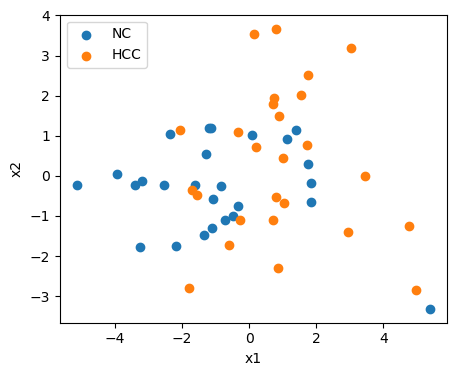

In [87]:
label = ['NC', 'HCC']
X2d = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots(figsize=(5, 4))
for i in range(2):
    plt.scatter(X2d[y == i, 0], X2d[y == i, 1], label=label[i])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

# Split data

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(41, 11) (11, 11)


# RFE

In [89]:
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid={'C':np.logspace(-3, 3, 7)}, cv=5, scoring='roc_auc', refit=True, verbose=4)
selector = RFECV(clf, step=1, cv=5, scoring='roc_auc', verbose=0, importance_getter=lambda clf: clf.best_estimator_.coef_)
selector.fit(X_train, y_train)
print(selector.support_)
print(selector.ranking_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...........................C=0.001;, score=0.583 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.833 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.778 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.444 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=1.000 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.583 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.833 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.778 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.444 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=1.000 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.667 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

d:\Mambaforge\envs\bioinformatics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Mambaforge\envs\bioinformatics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[CV 1/5] END ...........................C=0.001;, score=0.800 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.750 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.750 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.688 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=1.000 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.900 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.750 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.750 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.688 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=1.000 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.900 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.750 total time=   0.0s
[CV 3/5] END ...............

In [90]:
y_pred = selector.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC= auc(fpr, tpr)

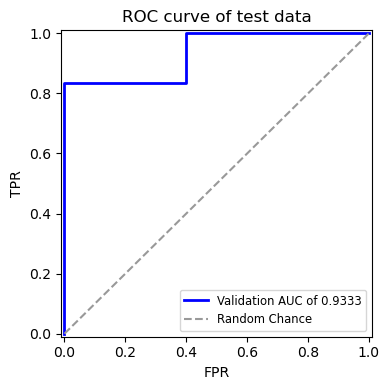

In [91]:
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, '-', color='b', label='Validation AUC of {:.4f}'.format(AUROC), lw=2)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Chance')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC curve of test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best',fontsize='small')
plt.tight_layout()
plt.show()
plt.close()

# Exhaustive enumeration

In [92]:
from itertools import combinations
feature_combinations=[]
for i in combinations(list(range(11)), 3):
    feature_combinations.append(list(i))
print(len(feature_combinations))

165


In [93]:
from sklearn.base import ClassifierMixin, BaseEstimator
class MaskedLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self,feature_indices=None,**params):
        self.feature_indices = feature_indices
        self.estimator = LogisticRegression(**params)
    def mask(self,X):
        if self.feature_indices is None:
            return X
        else:
            return X[:,self.feature_indices]
    def fit(self, X, y=None):
        self.classes_ = np.unique(y)
        return self.estimator.fit(self.mask(X),y)
    def predict(self, X):
        return self.estimator.predict(self.mask(X))
    def predict_proba(self, X):
        return self.estimator.predict_proba(self.mask(X))

In [94]:
clf = GridSearchCV(MaskedLogisticRegression(),
                   param_grid={"feature_indices":feature_combinations}, cv=5,
                   scoring="roc_auc",refit=True,verbose=0)
clf = clf.fit(X_train, y_train)
print(list(data.columns[clf.best_params_['feature_indices']]))

['SNORD3B', 'miR-122', 'miR-223']


In [95]:
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC= auc(fpr, tpr)

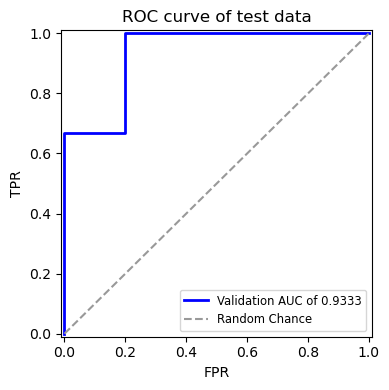

In [96]:
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, '-', color='b', label='Validation AUC of {:.4f}'.format(AUROC), lw=2)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Chance')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC curve of test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best',fontsize='small')
plt.tight_layout()
plt.show()
plt.close()